Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
STUDENT_ID = "210163399"

---

MTH765P - Coursework 4 
This is a template notebook for the last coursework assignment for MTH765P,
Closely follow the instructions in this template in order 
to complete the assessment and to obtain full marks. Please only
modify cells where you are instructed to do so. Failure to comply
may result in unexpected errors that can lead to mark deductions.

Author: Primoz Skraba


As usual, we begin by loading the necessary libraries. You should not 
import any other libraries.

In [2]:
import sqlite3 
import pandas as pd
import numpy as np

## Question 1 (30 points): 

-----------------------------------------


a.)  **(10 points)** Create a sqlite database called **nanoim.db** with the following tables.
- All numbers should be integers
- IDs should be the primary key
- All other entries should be of type TEXT

Be sure to close the table once you have created it. 

<h1><center>Movies</center></h1>

|MovieID  | Movie |Actor |Director|
|  :--:|  :----: |  :----:| :----:|
|1 | Idiocracy| 1 |4|
|2 | Predator |2 |1|
|3 | The Room |4  |2|
|4 | Point Break  |3 | 3 |


<h1><center>Actors</center></h1>

|ActorID  | Name | Rank|
|  :--:|  :----: |  :----:|
|1 |Terry Crews|3|
|2 | Arnold Schwarzenegger |2|
|3 |Keanu Reeves | 1 |
|4 |Tommy Wiseau |4|


<h1><center>Directors </center></h1>

|DirectorID  | Name |
|  :--:|  :----: | 
|1 |John McTiernan| 
|2 |Tommy Wiseau|
|3 |Kathryn Bigelow |
|4 |Mike Judge|





In [2]:
# YOUR CODE HERE
# create nanoim.db database
conn = sqlite3.connect('nanoim.db')
cursorObject = conn.cursor()

# create table Movies which has columns below
cursorObject.execute('''CREATE TABLE 
                        Movies(MovieID integer PRIMARY KEY, 
                        Movie text, Actor integer, Director integer)''')
# create table Actors which has columns below
cursorObject.execute('''CREATE TABLE 
                        Actors(ActorID integer PRIMARY KEY, 
                        Name text, Rank integer)''')
# create table Directors which has columns below
cursorObject.execute('''CREATE TABLE 
                        Directors(DirectorID integer PRIMARY KEY, 
                        Name text)''')

# insert values to the table Movies
cursorObject.execute('''INSERT INTO Movies(MovieID,Movie,Actor,Director) VALUES  (1, 'Idiocracy', 1, 4)''')
cursorObject.execute('''INSERT INTO Movies(MovieID,Movie,Actor,Director) VALUES  (2, 'Predator', 2, 1)''')
cursorObject.execute('''INSERT INTO Movies(MovieID,Movie,Actor,Director) VALUES (3, 'The Room', 4, 2)''')
cursorObject.execute('''INSERT INTO Movies(MovieID,Movie,Actor,Director) VALUES (4, 'Point Break', 3, 3)''')
# insert values to the table Actors
cursorObject.execute('''INSERT INTO Actors(ActorID,Name,Rank) VALUES  (1,'Terry Crews',3)''')
cursorObject.execute('''INSERT INTO Actors(ActorID,Name,Rank) VALUES  (2, 'Arnold Schwarzenegger', 2)''')
cursorObject.execute('''INSERT INTO Actors(ActorID,Name,Rank) VALUES (3, 'Keanu Reeves', 1)''')
cursorObject.execute('''INSERT INTO Actors(ActorID,Name,Rank) VALUES (4, 'Tommy Wiseau', 4)''')
# insert values to the table Directors
cursorObject.execute('''INSERT INTO Directors(DirectorID,Name) VALUES  (1,'John McTiernan')''')
cursorObject.execute('''INSERT INTO Directors(DirectorID,Name) VALUES  (2, 'Tommy Wiseau')''')
cursorObject.execute('''INSERT INTO Directors(DirectorID,Name) VALUES (3, 'Kathryn Bigelow')''')
cursorObject.execute('''INSERT INTO Directors(DirectorID,Name) VALUES (4, 'Mike Judge')''')
# execution above is commited
conn.commit()
# close the table
conn.close()


#raise NotImplementedError


----------------
----------------

b) (2 Point) Reconnect with **nanoim.db** in a connection named _conn_

----------------

In [3]:
# YOUR CODE HERE
conn = sqlite3.connect('nanoim.db')
#raise NotImplementedError()

For the rest of this question you will construct SQL queries and run them.
- Make sure to store the result in the variable name given
- Make queries so that they would work if the tables are expanded or updated. 
- Use only sqlite3 functions 

---------
---------

c.) **(5 Points)** Create a following query to return names of the actors who are ranked 3rd or higher (**The highest rank is 1**). Store the result in a variable called _actors_

---------

In [4]:
# YOUR CODE HERE
cursorObject = conn.cursor()
# execute the query column Rank is less and equal to 3, as 1 and 2 are higher rank than 3
cursorObject.execute('''SELECT name FROM Actors
                        where Rank <= 3;''',)
# assign the result of query above to actor_list 
actor_list = cursorObject.fetchall()
actors = []
# iterate all actors in actor_list
for actor in actor_list:
    # add each actor to list actors
    actors.append(actor[0])

#raise NotImplementedError()

---------
---------

d.) **(6 Points)** Create a following query to return the name of movies starring Keanu Reeves. Store the result in a variable called _keanu_

---------

In [7]:
# YOUR CODE HERE
# to return the name of movies starring Keanu Reeves, we have to do inner join table Actors and table Movies
cursorObject.execute('''SELECT Movie FROM Movies
                        inner join Actors on Actors.ActorID = Movies.Actor  
                        where Actors.name = 'Keanu Reeves';''',)
name_movie = cursorObject.fetchall()
# to get only the name of movie from the result, assign name_movie[0][0], as the type of name_movie is list and the vlaue of 'Point Break' is in tuple
keanu = name_movie[0][0]
#raise NotImplementedError()

---------
---------

e.) **(6 Points)** Create a following query to return the directors of movies starring Tommy Wiseau. Store the result in a variable called _tommy_

---------

In [9]:
# YOUR CODE HERE
# to return the name of director of movies starring Tommy Wiseau, we have to do inner join table Movies and table Directors
# after that we need condition which movie has actor Tommy Wiseau 
cursorObject.execute('''SELECT name FROM Directors
                        inner join Movies on Movies.Director = Directors.DirectorID 
                        where Movies.Actor = 
                        (select ActorID from Actors
                        where name = 'Tommy Wiseau');''',)
directors = cursorObject.fetchall()
# to get only the name of director from the result, assign directors[0][0], as the type of directors is list and the vlaue of 'Tommy Wiseau' is in tuple
tommy = directors[0][0]
#raise NotImplementedError()

----------
----------
f) **(1 Point)** Close the connection.

----------

In [11]:
# YOUR CODE HERE
conn.close()
#raise NotImplementedError()

## Question 2 (30 Points)
------------

We will connect to the database given in the file **music.db**. This database has quite a large
number of tables. We will deal with the following tables which have the following
columns.
- album: album id, title, artist id
- artist: artist id, name
- genre: genre id, name
- track: track id, name, album id, media type id, genre id, composer, milliseconds, bytes, unit price

In [3]:
m_conn = sqlite3.connect('music.db')

--------------
--------------
a.) **(6 points)** Construct a query which lists the  albums  Red Hot Chili Peppers have in the database and put it into variable called _rhcp_

--------------

In [4]:
# YOUR CODE HERE
cursor = m_conn.cursor()
# to return the name of albums which have artist 'Red Hot Chili Peppers', we have to do inner join table Movies and table Directors
cursor.execute('''SELECT title FROM album
                inner join artist on artist.artist_id = album.artist_id
                where artist.name = 'Red Hot Chili Peppers';''')

titles = cursor.fetchall()
rhcp = []
# iterate all titles in titles
for title in titles:
    # add each title to list rhcp
    rhcp.append(title[0])

#raise NotImplementedError()

--------------
--------------
b.) **(6 points)** Construct a query which lists  all the tracks on the album Achtung Baby and store the result in a variable called _u2_

--------------

In [17]:
# YOUR CODE HERE
# to return all the tracks on the album Achtung Baby, we need to do inner join table album and table track
cursor.execute('''SELECT name FROM track
                inner join album on album.album_id = track.album_id
                where album.title = 'Achtung Baby';''')

tracks = cursor.fetchall()
u2 = []
# iterate all tracks in tracks
for track in tracks:
    # add each track to list u2
    u2.append(track[0])

#raise trackz()


--------------
--------------

c.) **(8 points)** Construct a query which returns how much it would cost to buy all Metallica songs to the nearest pound and store it in a variable called _rockon_
- You should assume the track costs are in pounds

---------------

In [19]:
# YOUR CODE HERE
# to return the price to buy all Metallica songs, we need to do inner join table album and table track with column album_id
# after that we need condition that the artist id of Metallica is equal to the column artist_id of table album
# and then we have to sum of all unit_price of the result and then multiply 0.83 ($1 equals to £0.83)
cursor.execute('''SELECT sum(unit_price)*0.83 FROM track
                inner join album on album.album_id = track.album_id
                where album.artist_id =
                (select artist.artist_id from artist
                where name = 'Metallica')''')
# to get only the price from the result, assign cursor.fetchall()[0][0] to rockon, as the type of cursor.fetchall() is list and the vlaue of '89.8127~~' is in tuple
rockon = cursor.fetchall()[0][0]

#raise NotImplementedError()

In [20]:
rockon

92.03039999999983

--------------
--------------

d.) **(10 points)** Construct a query which returns the name and the length of the longest Rock song and transforms it in seconds (to the nearest second) and stores the name in a variable called _longsong_ and the length in a variable called _time_

---------------

In [21]:
# YOUR CODE HERE
# to return the name the logest song and the seconds of the logest song,
# we need to do inner join table genre and track with the column genre_id
# and we need the condition that the name of genre equals to Rock
# after that we can transform maximum of milliseconds of result to second by dividing 1000
# also we need to select name of track using track.name
cursor.execute('''SELECT max(milliseconds)/1000, track.name FROM track
                inner join genre on genre.genre_id = track.genre_id
                where genre.name = 'Rock' ;''')
x = cursor.fetchall()
# assign x[0][0] to time, and x[0][1] to longsong
# as the type of x is list and each value is in tuple
time = x[0][0] 
longsong = x[0][1]

#print(time, longsong)

#raise NotImplementedError()

In [24]:
m_conn.close()

## Question 3 (30 Points)
------------


We will connect to the database given in the file **eateries.sqlite**. This database has health inspection violations for San Francisco stored in 3 tables
- 'businesses'
- 'inspections'
- 'violations'

The cell below will print out the columns of the tables as pandas dataframes so you can examine them and then construct the queries. Unless otherwise stated you must only use SQL to get full marks. 

In [25]:
# This will open the connection
# and print out the tables

# the function takes as input the Cursor_Object and 
# returns the table in form of pd.DataFrame()
def sql_to_frame(cu):
    data = cu.fetchall()
    data = list(list(x) for x in data)
    dataColumns = [column[0] for column in cu.description]
    df = pd.DataFrame(data, columns=dataColumns)
    return df 


e_conn = sqlite3.connect('eateries.sqlite')
c = e_conn.cursor()
table_list =['businesses','inspections','violations']
for t in table_list:
    print(t)
    c.execute(f"PRAGMA table_info({t});")
    display(sql_to_frame(c))

businesses


,cid,name,type,notnull,dflt_value,pk
0,0,business_id,INTEGER,1,None,0
1,1,name,VARCHAR(64),0,None,0
2,2,address,VARCHAR(50),0,None,0
3,3,city,VARCHAR(23),0,None,0
4,4,postal_code,VARCHAR(9),0,None,0
5,5,latitude,FLOAT,0,None,0
6,6,longitude,FLOAT,0,None,0
7,7,phone_number,BIGINT,0,None,0
8,8,TaxCode,VARCHAR(4),0,None,0
9,9,business_certificate,INTEGER,0,None,0


inspections


,cid,name,type,notnull,dflt_value,pk
0,0,business_id,TEXT,1,None,0
1,1,Score,INTEGER,0,None,0
2,2,date,TEXT,1,None,0
3,3,type,VARCHAR(33),1,None,0


violations


,cid,name,type,notnull,dflt_value,pk
0,0,business_id,TEXT,1,None,0
1,1,date,TEXT,1,None,0
2,2,ViolationTypeID,TEXT,1,None,0
3,3,risk_category,TEXT,1,None,0
4,4,description,TEXT,1,None,0


-----------
-----------

a.) **(6 points)** How many restaurants do not have a precise geographic location given. Store the number (and only the number) in a variable called _locations_.

------------


In [26]:
# YOUR CODE HERE
# to return the count of restaurants where don't have precise geographic location,
# we need the condition that the value of latitude is null or 
# the value of longitude is null
# also we need condition that latitude =0 and longitude = 0 
# because latitude =0 and longitude = 0 means that there is no location
c.execute('''SELECT count(*) as cnt from  businesses
                        where latitude is null or longitude is null
                        or (latitude =0 and longitude = 0);''')
# assign c.fetchall()[0][0] to locations,
# as the type of c.fetchall() is list and the value is in tuple
locations = c.fetchall()[0][0]

# the other way using the function sql_to_frame()
#t = c.execute('''SELECT count(*) as cnt from  businesses
#                        where latitude is null or longitude is null
#                        or (latitude =0 and longitude = 0);''')
#cnt = sql_to_frame(t)
#locations = cnt['cnt'][0]


-----------
-----------

b.)  **(8 points )** How many spellings of San Francisco are there? (You can assume that all variations count including modifiers such as north, south, east, west) also refer to San Francisco. **You can obtain the result through visual inspection**. Store the number in a variable called _SF_

------------


In [83]:
# YOUR CODE HERE
# to return the count of spellings of San Francisco,
# we need to check two columns which have names of cities
# at first, I selected only two columns which is not null

c.execute('''SELECT city, owner_city  from  businesses
            where city is not null
            or owner_city is not null
            ''')
# create list res which get names of cities
res = []
r = c.fetchall()
for i in range(len(r)):
    for j in range(2):
        res.append(r[i][j])

# use set to remove redundant names of cities
cities = set(res)

# from visual inspection of cities, I can get the list below
ans={'S F',
 'S. SF',
 'S.F.',
 'S.S.F',
 'S.S.F.',
 'S.SF',
 'SAN FANCISCO',
 'SAN FRANCICSO',
 'SAN FRANCISCO',
 'SAN FRANCISO',
 'SAN FRANICSCO',
 'SAN FRNACISCO',
 'SANF FRANCISCO',
 'SF',
 'SF , CA',
 'SF, CA',
 'SF, CA 94110',
 'SF, CA 94115',
 'SF.',
 'SF`',
 'SO. S.F.',
 'SO. SAN FRANCISCO',
 'SO.S.F.',
 'SOUTH SAN FRANCISCO',
 'SSF',
 'Sab Francisco',
 'San Frabcusci',
 'San Fracncisco',
 'San Francicso',
 'San Franciisco',
 'San Francisc',
 'San Francisc0o',
 'San Franciscco',
 'San Francisco',
 'San Francisco,',
 'San Francisco, CA',
 'San Francisco, CA 94132',
 'San Francisco, Ca',
 'San Francisco, Ca.',
 'San Franciscoo',
 'San Franciscvo',
 'San Franciso',
 'San Francisoc',
 'San Francsico',
 'San Franicisco',
 'San Franicsco',
 'San Frfancisco',
 'San Frqancisco',
 'San francisco',
 'SanFrancisco',
 'Sand Francisco',
 'Sn Francisco',
 'So. S.F.',
 'So. SF',
 'So. San Francisco',
 'South S. F.',
 'South S.F.',
 'South SF',
 'South San Francisco',
 'South San francisco',
 's.F. Ca',
 'san Francisco',
 'san Francisco CA',
 'san francisco',
 'sf'}

SF = len(ans)



#c.execute('''SELECT name, address, city, postal_code, TaxCode,
#            owner_name, owner_address, owner_city, owner_state, owner_zip
#            from  businesses
#                    where name like '%San Francisco%'
#                    or address like '%San Francisco%'
#                    or city like '%San Francisco%'
#                    or postal_code like '%San Francisco%'
#                    or TaxCode like '%San Francisco%'
#                    or owner_name like '%San Francisco%'
#                    or owner_address like '%San Francisco%'
#                    or owner_city like '%San Francisco%'
#                    or owner_state like '%San Francisco%'
#                    or owner_zip like '%San Francisco%'
#            ''')
#set(c.fetchall())
#SF = len(set(c.fetchall()))
# assign c.fetchall()[0][0] to SF, 
# as the type of c.fetchall() is list and the value is in tuple
#SF = c.fetchall()[0][0]

# the other way using the function sql_to_frame()
#t = c.execute('''SELECT count(*) san_cnt from  businesses
#                    where name like '%San Francisco%'
#                    or address like '%San Francisco%'
#                    or city like '%San Francisco%'
#                    or postal_code like '%San Francisco%'
#                    or TaxCode like '%San Francisco%'
#                    or owner_name like '%San Francisco%'
#                    or owner_address like '%San Francisco%'
#                    or owner_city like '%San Francisco%'
#                    or owner_state like '%San Francisco%'
#                    or owner_zip like '%San Francisco%'
#            ''')
#san_cnt = sql_to_frame(t)
#SF = san_cnt['san_cnt'][0]


#raise NotImplementedError()


-----------
-----------

c.) **(16 points)**  Create a histogram plot of the Inspection Scores for January 2014. 
- Here you should use the function _sql_to_frame()_ which takes a query and returns a pandas dataframe.
- Remove any null values
------------


<AxesSubplot:title={'center':'Inspection Scores for January 2014'}, ylabel='Frequency'>

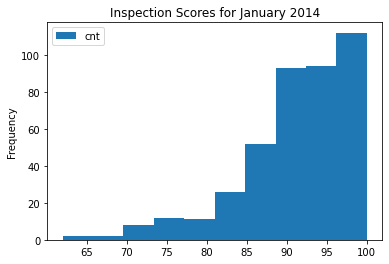

In [31]:
# YOUR CODE HERE
# to return the score of the tavle inspections for January 2014
# we need condition that the column date is greater than or equal to '20140101' 
# less than or equal to '20140131'
# also we don't need that score is null
t = c.execute('''SELECT score as cnt from  inspections
                        where date >= '20140101'
                        and date <= '20140131'
                        and score is not null
                        ''')
# As the type of the result of sql_to_frame(t) is DataFrame,
# we can use hist() directly
#sql_to_frame(t).hist()
sql_to_frame(t).plot(kind='hist', title='Inspection Scores for January 2014')
#raise NotImplementedError()